# EDA

W tym notatniku przeprowadzam Exploratory Data Analysis (EDA) na zbiorze danych zebranych przy użyciu opaski Mindwave Mobile 2 (NeuroSky). <br>Dokumentacja urządenia jest dostępna pod linkiem: https://developer.neurosky.com/docs/doku.php?id=mindwave.
<br>Dane przedstawiają próbę autentykacji użytkownika na podstawie fal EEG. Użytkownik został wystawiony na działanie znanych i nieznanych mu bodźców wizualnych - informację tę przedstawia kolumna `Flag`. Dane zostały wstępnie przetworzone przez średnią kroczącą o wielkości okna 5.

## 1. Import bibliotek, zapoznanie się z danymi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("autentykacja_eeg_v2.csv", sep=";")

In [3]:
df.head(10)

Flag    Delta   Theta  Alpha_low  Alpha_high  Beta_low  Beta_high  \
0     1   262466   17013      25803       16111      2057       3064   
1     1   156671    5978       2173        1203      1025        591   
2     1   420205    9451       2731        3809      1719       4884   
3     1  1011946   57480       4534       10354      7409       2815   
4     1   937903  225754      88704       38777     12663      16150   
5     1   778863  302268      11871       58241     32758      61322   
6     1    77880   35779       3652        6341      6655       3018   
7     1   149627   16884       4242        4484      5116       3295   
8     1    85213    8680       2364         797      1570       1836   
9     1   627194  102265      15012       16021     30043       3514   

   Gamma_low  Gamma_high  Attention  Meditation  BlinkStrength  
0       1616        3629          0           0             -1  
1        361         121          0           0             -1  
2       2811        1304          0           0             -1  
3       5016        1030          0           0             -1  
4      15275        7426         34          51             -1  
5      32156        6088         40          40             -1  
6        974        1079         38          30             -1  
7       2897        1968         41          37             51  
8       1647         279         53          21             -1  
9       7110        1281         35          27             39

In [4]:
df.dtypes

Flag             int64
Delta            int64
Theta            int64
Alpha_low        int64
Alpha_high       int64
Beta_low         int64
Beta_high        int64
Gamma_low        int64
Gamma_high       int64
Attention        int64
Meditation       int64
BlinkStrength    int64
dtype: object

In [5]:
df.describe()

Flag         Delta         Theta      Alpha_low     Alpha_high  \
count  7488.000000  7.488000e+03  7.488000e+03    7488.000000    7488.000000   
mean      0.561832  3.057571e+05  6.203814e+04   15488.460337   12827.290465   
std       0.496195  4.912833e+05  1.136191e+05   29270.995706   21890.222896   
min       0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%       0.000000  1.946475e+04  1.181000e+04    3087.500000    3157.000000   
50%       1.000000  7.908500e+04  2.672700e+04    7116.000000    6684.000000   
75%       1.000000  3.889475e+05  6.359675e+04   16240.250000   13810.000000   
max       1.000000  3.847250e+06  2.072669e+06  560568.000000  574992.000000   

            Beta_low      Beta_high      Gamma_low     Gamma_high  \
count    7488.000000    7488.000000    7488.000000    7488.000000   
mean    10501.763221    8722.354300    6498.413061    3138.050347   
std     20775.034225   15576.102166    9513.537049    4794.297045   
min         0.000000       0.000000       0.000000       0.000000   
25%      2700.000000    2516.000000    1564.750000     756.000000   
50%      5539.000000    5261.000000    3560.000000    1719.000000   
75%     11469.250000   10493.000000    8017.750000    3786.000000   
max    812576.000000  831441.000000  200491.000000  100787.000000   

         Attention   Meditation  BlinkStrength  
count  7488.000000  7488.000000    7488.000000  
mean     52.853232    59.330529      11.113782  
std      20.040042    18.510044      27.602990  
min      -1.000000    -1.000000      -1.000000  
25%      40.000000    48.000000      -1.000000  
50%      53.000000    60.000000      -1.000000  
75%      66.000000    70.000000      -1.000000  
max     100.000000   100.000000     255.000000

In [6]:
len(df)

7488

## 2. Wizualizacja danych

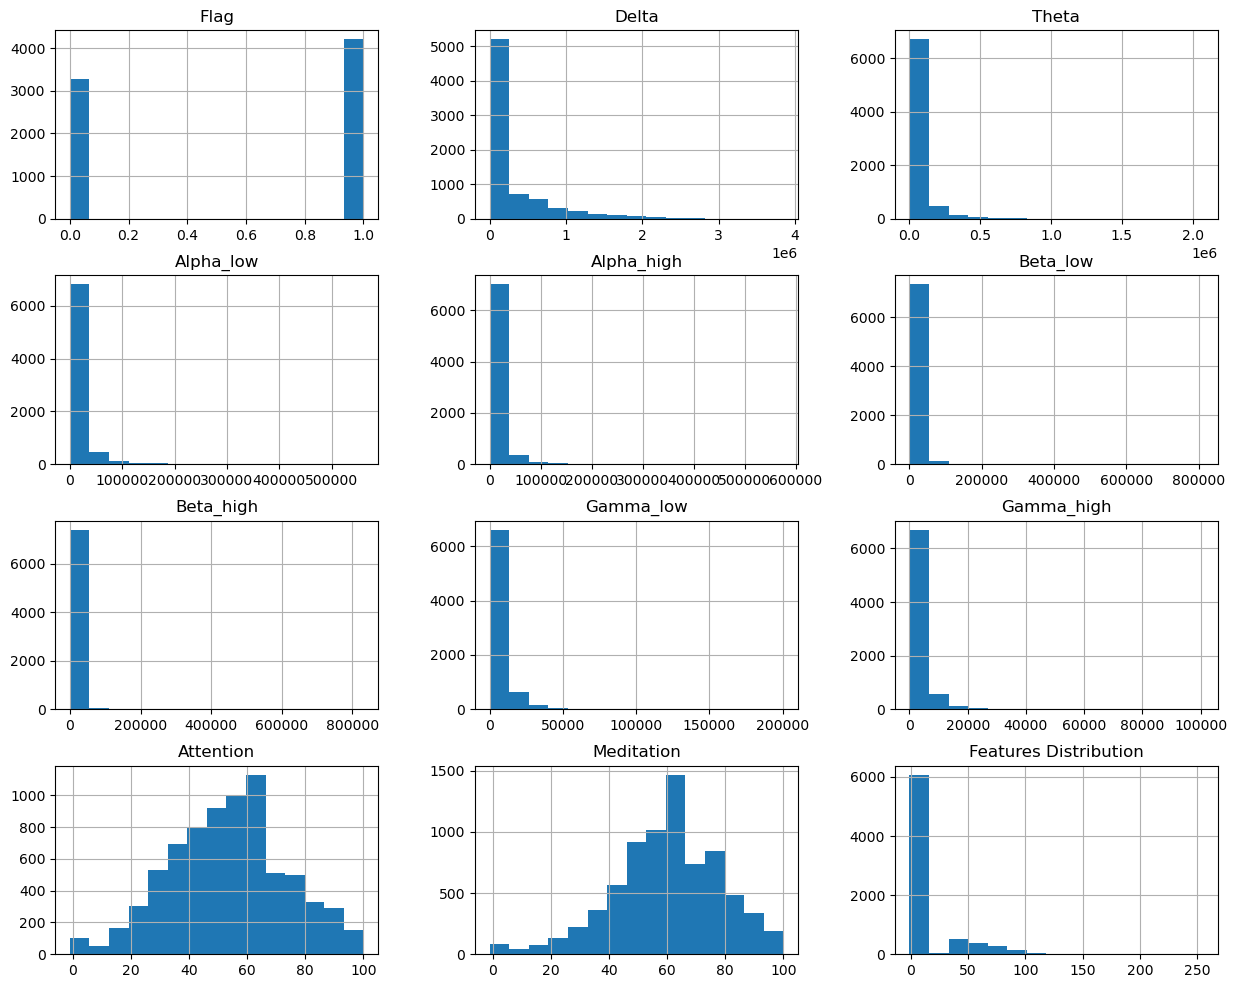

In [7]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

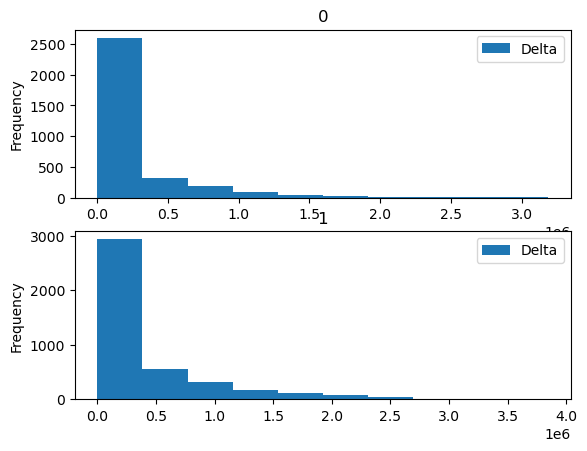

In [8]:
ax = df.plot.hist(column=["Delta"], by="Flag")

<Axes: xlabel='Flag'>

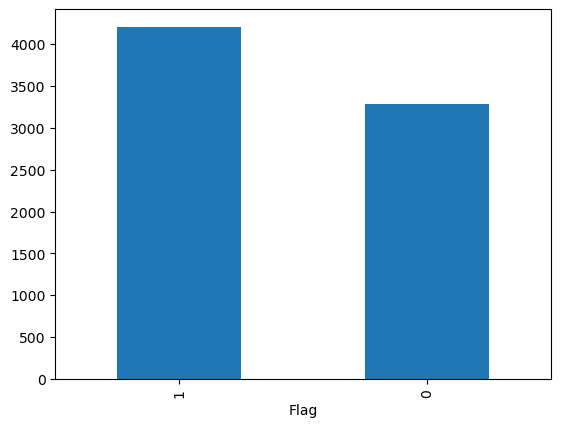

In [9]:
df.Flag.value_counts().plot(kind="bar")

In [10]:
df.corr()

Flag     Delta     Theta  Alpha_low  Alpha_high  Beta_low  \
Flag           1.000000  0.158377  0.120244   0.102253    0.115965  0.087306   
Delta          0.158377  1.000000  0.521772   0.442846    0.441553  0.395328   
Theta          0.120244  0.521772  1.000000   0.552741    0.535258  0.473450   
Alpha_low      0.102253  0.442846  0.552741   1.000000    0.580842  0.558267   
Alpha_high     0.115965  0.441553  0.535258   0.580842    1.000000  0.692800   
Beta_low       0.087306  0.395328  0.473450   0.558267    0.692800  1.000000   
Beta_high      0.045617  0.359862  0.445103   0.519986    0.660731  0.792776   
Gamma_low     -0.005493  0.396407  0.577407   0.559808    0.570896  0.572237   
Gamma_high     0.006331  0.378313  0.547093   0.507108    0.531184  0.520570   
Attention     -0.235820 -0.260685 -0.228099  -0.159640   -0.155392 -0.091510   
Meditation     0.035766 -0.083179 -0.126619   0.062387    0.040071 -0.021744   
BlinkStrength  0.127469  0.163388  0.190686   0.154332    0.098061  0.097663   

               Beta_high  Gamma_low  Gamma_high  Attention  Meditation  \
Flag            0.045617  -0.005493    0.006331  -0.235820    0.035766   
Delta           0.359862   0.396407    0.378313  -0.260685   -0.083179   
Theta           0.445103   0.577407    0.547093  -0.228099   -0.126619   
Alpha_low       0.519986   0.559808    0.507108  -0.159640    0.062387   
Alpha_high      0.660731   0.570896    0.531184  -0.155392    0.040071   
Beta_low        0.792776   0.572237    0.520570  -0.091510   -0.021744   
Beta_high       1.000000   0.603569    0.524672  -0.005454   -0.028349   
Gamma_low       0.603569   1.000000    0.728132  -0.010632   -0.008990   
Gamma_high      0.524672   0.728132    1.000000  -0.032116   -0.022825   
Attention      -0.005454  -0.010632   -0.032116   1.000000    0.271749   
Meditation     -0.028349  -0.008990   -0.022825   0.271749    1.000000   
BlinkStrength   0.077856   0.088751    0.047695  -0.102539   -0.035034   

               BlinkStrength  
Flag                0.127469  
Delta               0.163388  
Theta               0.190686  
Alpha_low           0.154332  
Alpha_high          0.098061  
Beta_low            0.097663  
Beta_high           0.077856  
Gamma_low           0.088751  
Gamma_high          0.047695  
Attention          -0.102539  
Meditation         -0.035034  
BlinkStrength       1.000000

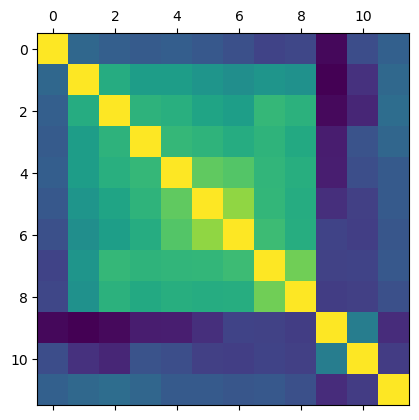

In [11]:
plt.matshow(df.corr())
plt.show()

<Axes: xlabel='Theta', ylabel='Alpha_low'>

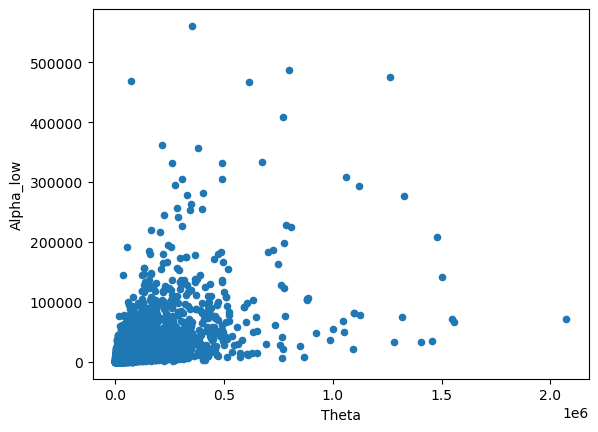

In [12]:
df['Theta'].corr(df["Alpha_low"])
df.plot(x="Theta", y="Alpha_low", kind="scatter")

<Axes: >

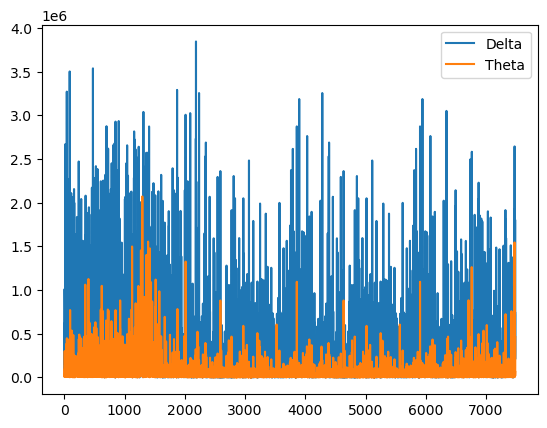

In [13]:
df.plot(y=["Delta", "Theta"])

<Axes: xlabel='Beta_high'>

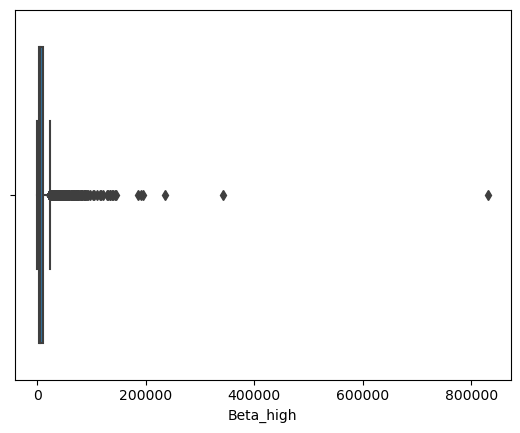

In [14]:
import seaborn as sns
sns.boxplot(x=df['Beta_high'])

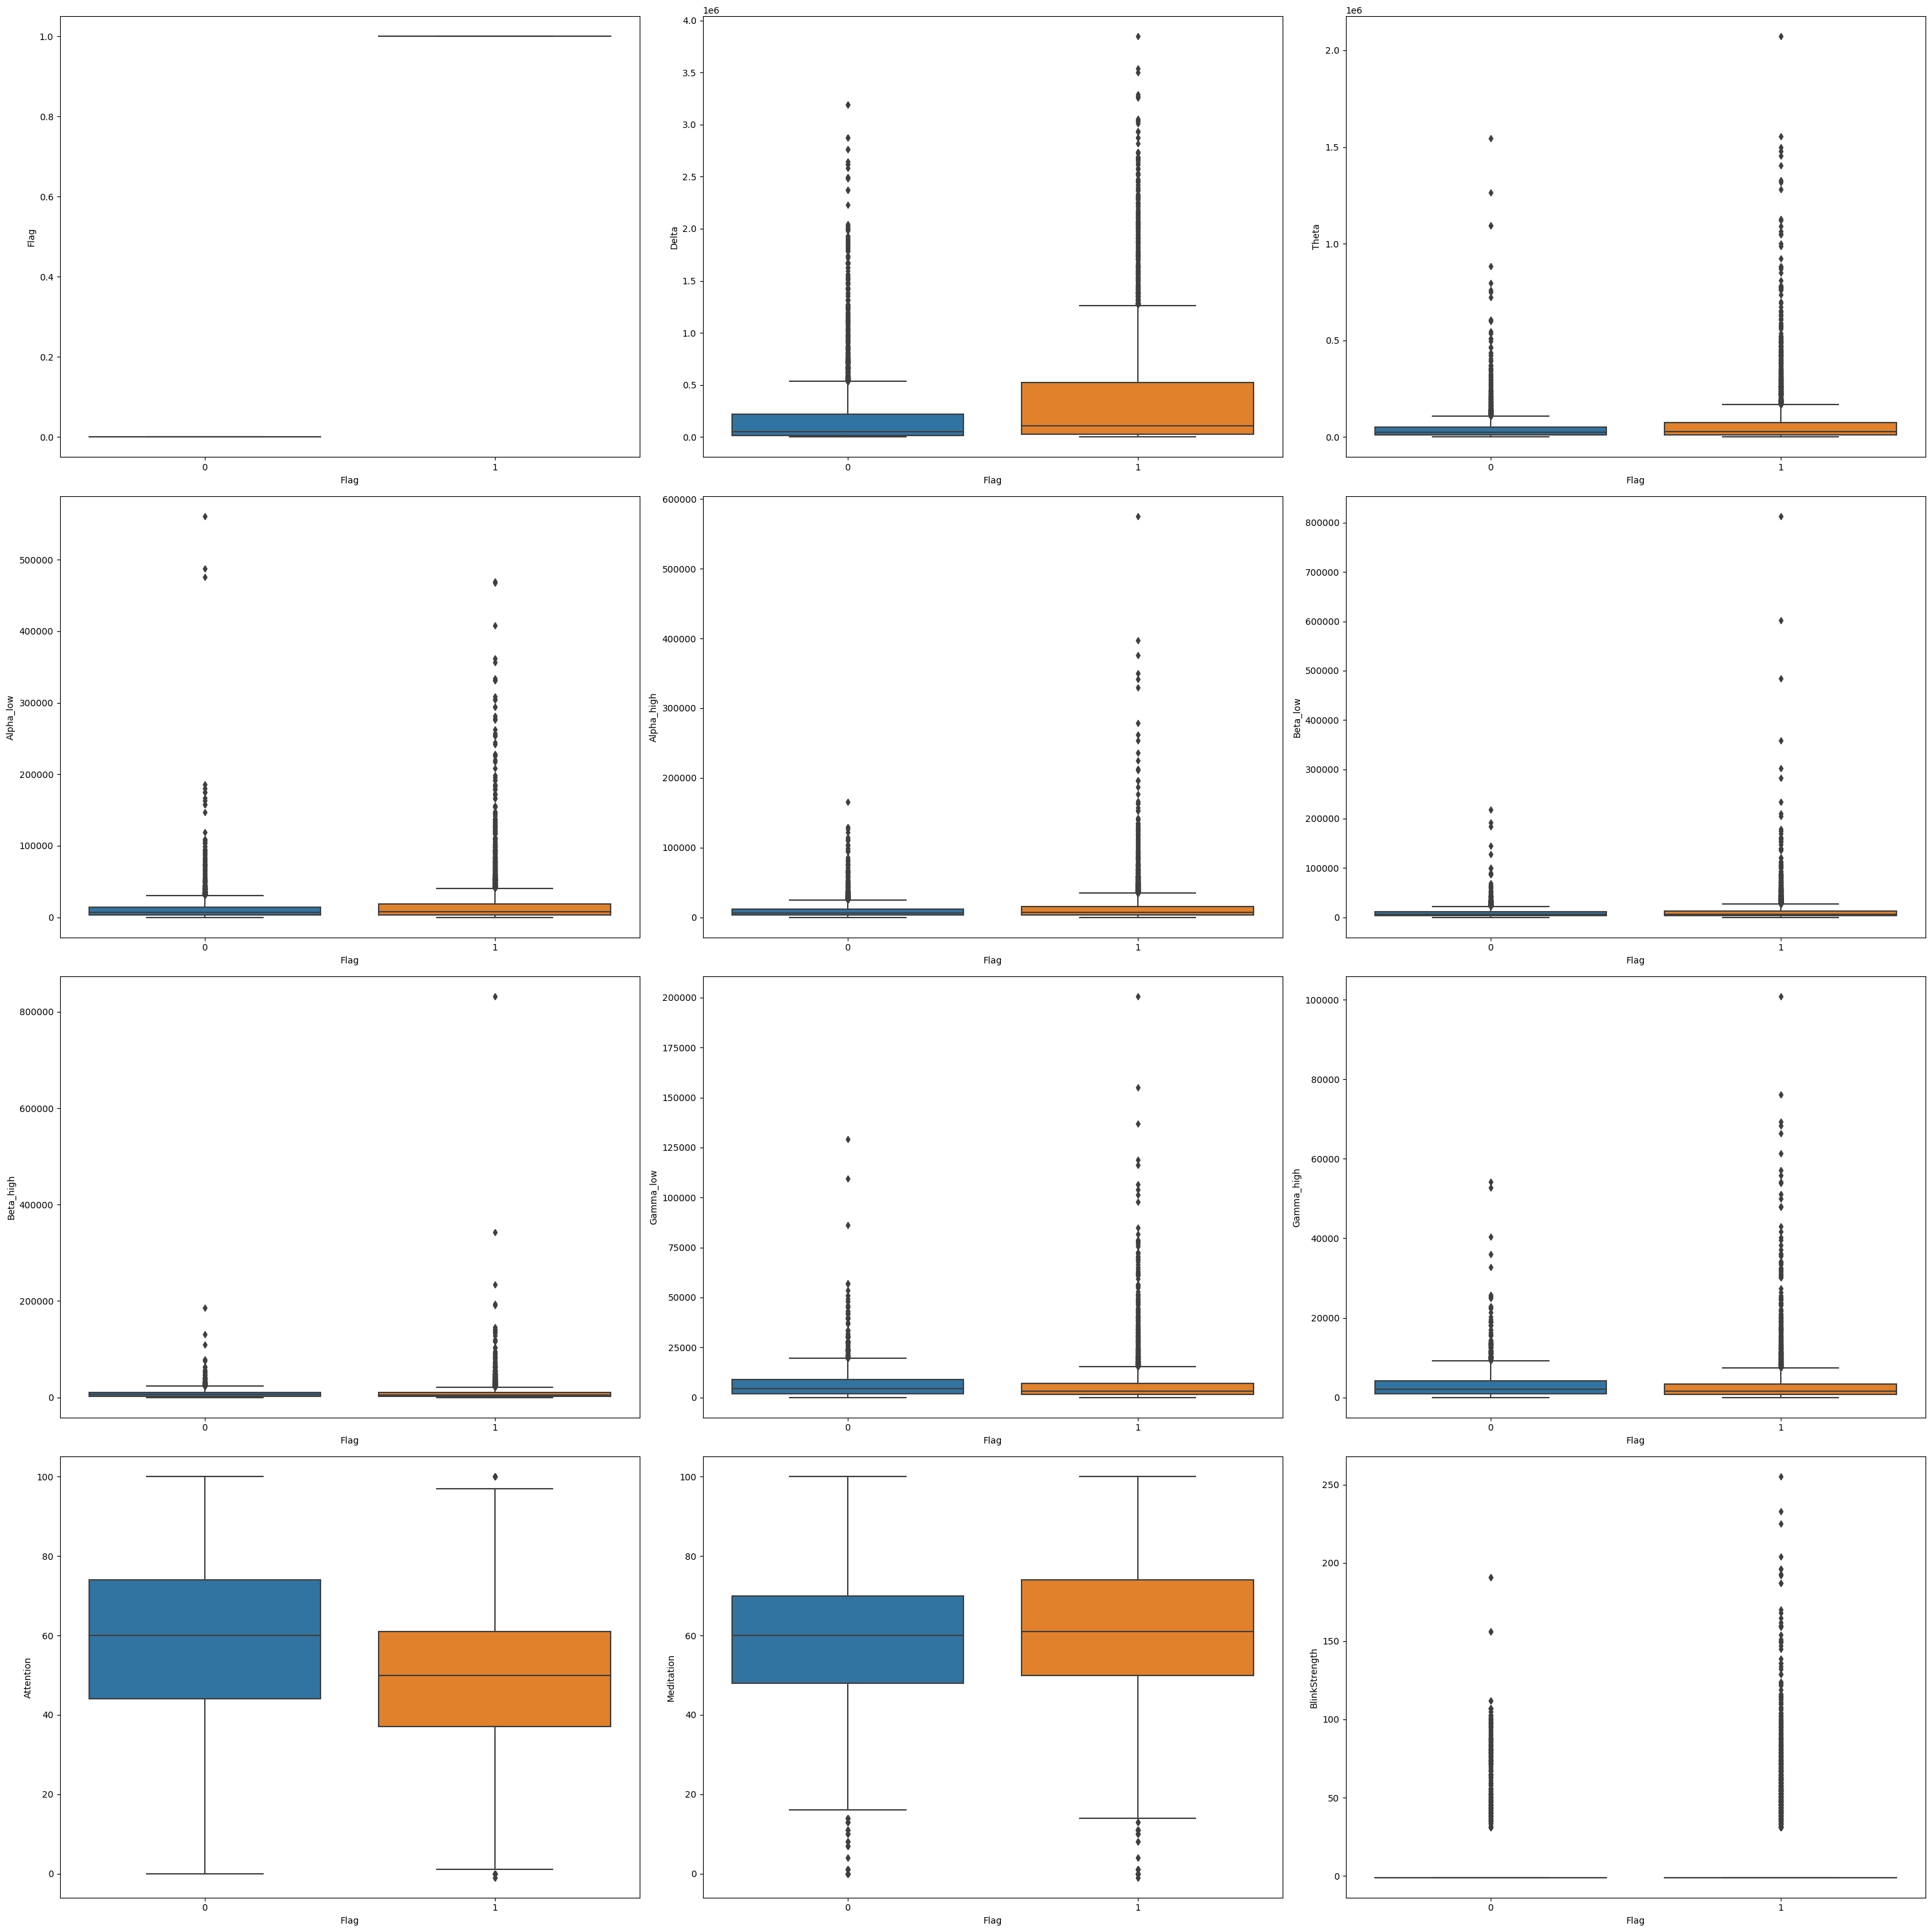

In [15]:
n_cols = 3
n_rows = 4
fig,ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,30))
row = 0
col = 0
for i in df.columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df["Flag"], y = df[i], ax = axes)
    col += 1
plt.tight_layout()
plt.show()

<Axes: >

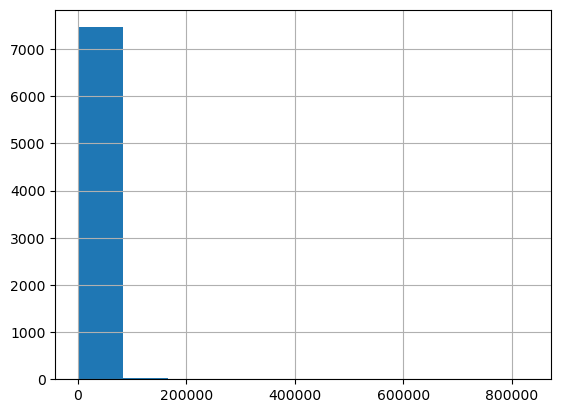

In [16]:
df["Beta_high"].hist()

## 3. Obróbka danych
Powyższe wykresy są bardzo nieczytelne. Dane wypada przerobić w taki sposób, aby łatwiej było badać ich właściwości, ale jednocześnie nie zaburzyć odzwierciedlanych przez nie informacji. Jedną z powszechnie stosowanych metod są matematyczne transformacje danych. Możemy do nich zaliczyć:
* `log transformation`,
* `square root transformation`,
* `cube root transformation`.

Do tego zbioru danych nie można zastosować transformacji logarytmicznej, ponieważ można ją przeprowadzić tylko na wartościach niezerowych. Zdecydowałam się na pierwiastek sześcienny.

In [17]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Flag, Delta, Theta, Alpha_low, Alpha_high, Beta_low, Beta_high, Gamma_low, Gamma_high, Attention, Meditation, BlinkStrength]
Index: []

In [18]:
df["Delta"].min()

0

In [22]:
new_df = df.copy()

In [23]:
new_df.head()

Flag    Delta   Theta  Alpha_low  Alpha_high  Beta_low  Beta_high  \
0     1   262466   17013      25803       16111      2057       3064   
1     1   156671    5978       2173        1203      1025        591   
2     1   420205    9451       2731        3809      1719       4884   
3     1  1011946   57480       4534       10354      7409       2815   
4     1   937903  225754      88704       38777     12663      16150   

   Gamma_low  Gamma_high  Attention  Meditation  BlinkStrength  
0       1616        3629          0           0             -1  
1        361         121          0           0             -1  
2       2811        1304          0           0             -1  
3       5016        1030          0           0             -1  
4      15275        7426         34          51             -1

In [24]:
df.head()

Flag    Delta   Theta  Alpha_low  Alpha_high  Beta_low  Beta_high  \
0     1   262466   17013      25803       16111      2057       3064   
1     1   156671    5978       2173        1203      1025        591   
2     1   420205    9451       2731        3809      1719       4884   
3     1  1011946   57480       4534       10354      7409       2815   
4     1   937903  225754      88704       38777     12663      16150   

   Gamma_low  Gamma_high  Attention  Meditation  BlinkStrength  
0       1616        3629          0           0             -1  
1        361         121          0           0             -1  
2       2811        1304          0           0             -1  
3       5016        1030          0           0             -1  
4      15275        7426         34          51             -1

In [20]:
new_df.columns

Index(['Flag', 'Delta', 'Theta', 'Alpha_low', 'Alpha_high', 'Beta_low',
       'Beta_high', 'Gamma_low', 'Gamma_high', 'Attention', 'Meditation',
       'BlinkStrength'],
      dtype='object')

In [25]:
new_df['Delta'] = np.cbrt(new_df['Delta'])
new_df['Theta'] = np.cbrt(new_df['Theta'])
new_df['Alpha_low'] = np.cbrt(new_df['Alpha_low'])
new_df['Alpha_high'] = np.cbrt(new_df['Alpha_high'])
new_df['Beta_low'] = np.cbrt(new_df['Beta_low'])
new_df['Beta_high'] = np.cbrt(new_df['Beta_high'])
new_df['Gamma_low'] = np.cbrt(new_df['Gamma_low'])
new_df['Gamma_high'] = np.cbrt(new_df['Gamma_high'])

In [26]:
new_df.head()

Flag       Delta      Theta  Alpha_low  Alpha_high   Beta_low  Beta_high  \
0     1   64.026194  25.719368  29.549949   25.256558  12.717784  14.524335   
1     1   53.909198  18.148969  12.952489   10.635434  10.082648   8.391942   
2     1   74.900906  21.142642  13.977856   15.617217  11.979130  16.966485   
3     1  100.396625  38.592738  16.551112   21.795628  19.494849  14.119722   
4     1   97.885713  60.889885  44.597899   33.847355  23.308386  25.276921   

   Gamma_low  Gamma_high  Attention  Meditation  BlinkStrength  
0  11.734929   15.367232          0           0             -1  
1   7.120367    4.946087          0           0             -1  
2  14.113031   10.925111          0           0             -1  
3  17.117980   10.099016          0           0             -1  
4  24.811922   19.509747         34          51             -1

In [27]:
df.head()

Flag    Delta   Theta  Alpha_low  Alpha_high  Beta_low  Beta_high  \
0     1   262466   17013      25803       16111      2057       3064   
1     1   156671    5978       2173        1203      1025        591   
2     1   420205    9451       2731        3809      1719       4884   
3     1  1011946   57480       4534       10354      7409       2815   
4     1   937903  225754      88704       38777     12663      16150   

   Gamma_low  Gamma_high  Attention  Meditation  BlinkStrength  
0       1616        3629          0           0             -1  
1        361         121          0           0             -1  
2       2811        1304          0           0             -1  
3       5016        1030          0           0             -1  
4      15275        7426         34          51             -1

In [87]:
new_df.to_csv("autentykacja_eeg_v2_cbrt.csv", sep=";", index=False)

## 4. Nowe wykresy

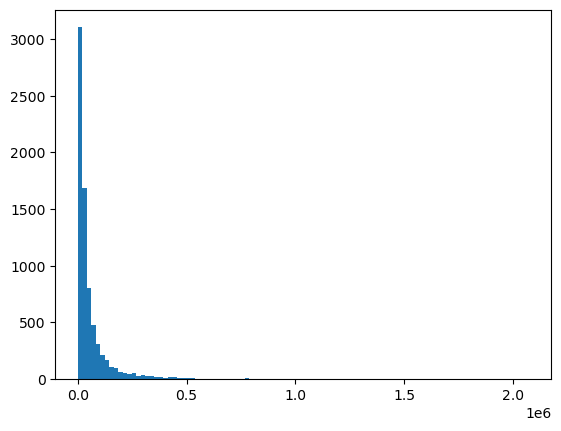

In [29]:
plt.hist(df['Theta'], bins=100);

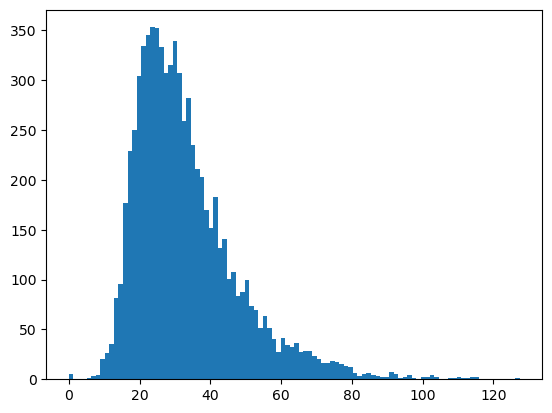

In [30]:
plt.hist(new_df['Theta'], bins=100);

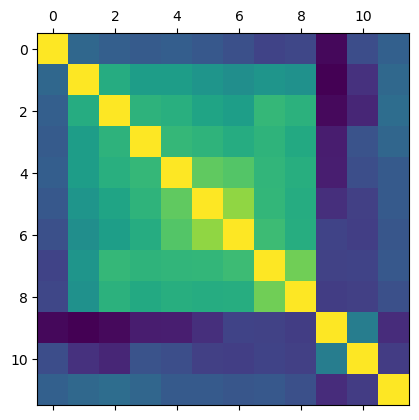

In [32]:
plt.matshow(df.corr())
plt.show()

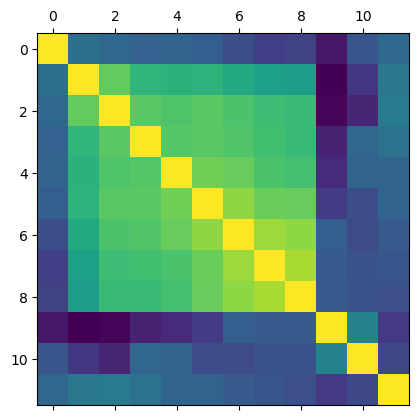

In [33]:
plt.matshow(new_df.corr())
plt.show()

In [34]:
new_df.corr()

Flag     Delta     Theta  Alpha_low  Alpha_high  Beta_low  \
Flag           1.000000  0.169582  0.118991   0.095496    0.106601  0.074421   
Delta          0.169582  1.000000  0.683938   0.548573    0.530535  0.531256   
Theta          0.118991  0.683938  1.000000   0.664087    0.635893  0.664255   
Alpha_low      0.095496  0.548573  0.664087   1.000000    0.651021  0.664176   
Alpha_high     0.106601  0.530535  0.635893   0.651021    1.000000  0.716992   
Beta_low       0.074421  0.531256  0.664255   0.664176    0.716992  1.000000   
Beta_high     -0.000814  0.484029  0.627576   0.640401    0.694171  0.778511   
Gamma_low     -0.073560  0.429747  0.588015   0.598377    0.625543  0.704482   
Gamma_high    -0.058068  0.414342  0.568677   0.575923    0.612526  0.691743   
Attention     -0.235820 -0.319935 -0.294743  -0.191080   -0.163775 -0.086261   
Meditation     0.035766 -0.107800 -0.178935   0.115966    0.107407 -0.006578   
BlinkStrength  0.127469  0.208938  0.231471   0.172631    0.103810  0.103243   

               Beta_high  Gamma_low  Gamma_high  Attention  Meditation  \
Flag           -0.000814  -0.073560   -0.058068  -0.235820    0.035766   
Delta           0.484029   0.429747    0.414342  -0.319935   -0.107800   
Theta           0.627576   0.588015    0.568677  -0.294743   -0.178935   
Alpha_low       0.640401   0.598377    0.575923  -0.191080    0.115966   
Alpha_high      0.694171   0.625543    0.612526  -0.163775    0.107407   
Beta_low        0.778511   0.704482    0.691743  -0.086261   -0.006578   
Beta_high       1.000000   0.804483    0.774596   0.075922   -0.011966   
Gamma_low       0.804483   1.000000    0.826149   0.058288    0.006207   
Gamma_high      0.774596   0.826149    1.000000   0.052042    0.005820   
Attention       0.075922   0.058288    0.052042   1.000000    0.271749   
Meditation     -0.011966   0.006207    0.005820   0.271749    1.000000   
BlinkStrength   0.061567   0.032296    0.001239  -0.102539   -0.035034   

               BlinkStrength  
Flag                0.127469  
Delta               0.208938  
Theta               0.231471  
Alpha_low           0.172631  
Alpha_high          0.103810  
Beta_low            0.103243  
Beta_high           0.061567  
Gamma_low           0.032296  
Gamma_high          0.001239  
Attention          -0.102539  
Meditation         -0.035034  
BlinkStrength       1.000000

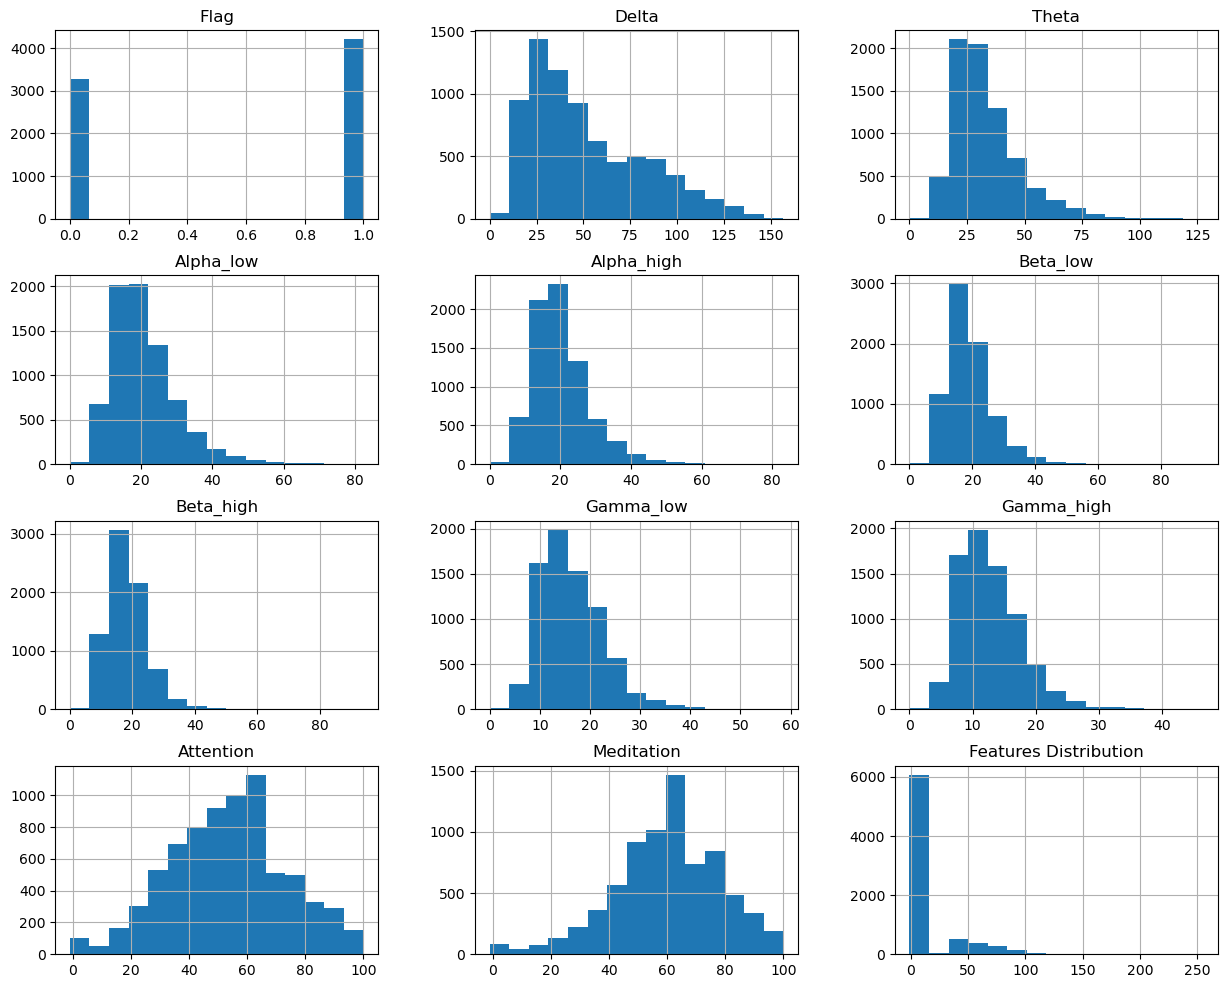

In [35]:
new_df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

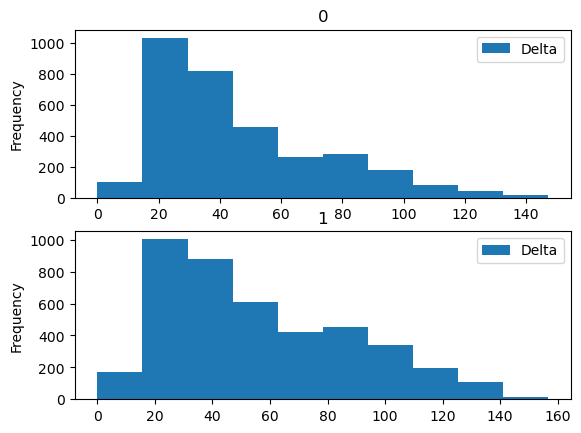

In [36]:
ax = new_df.plot.hist(column=["Delta"], by="Flag")

<Axes: >

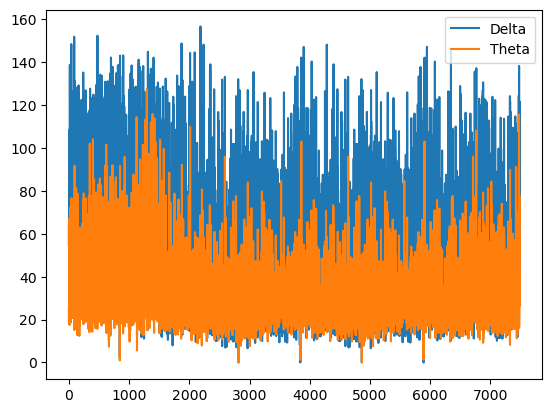

In [37]:
new_df.plot(y=["Delta", "Theta"])

<Axes: xlabel='Theta', ylabel='Delta'>

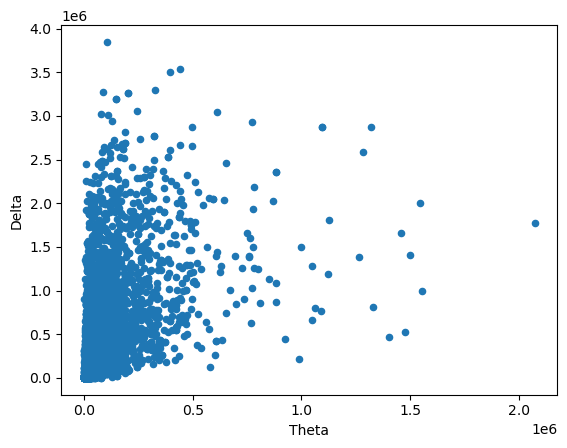

In [39]:
df['Theta'].corr(df["Delta"])
df.plot(x="Theta", y="Delta", kind="scatter")

<Axes: xlabel='Theta', ylabel='Delta'>

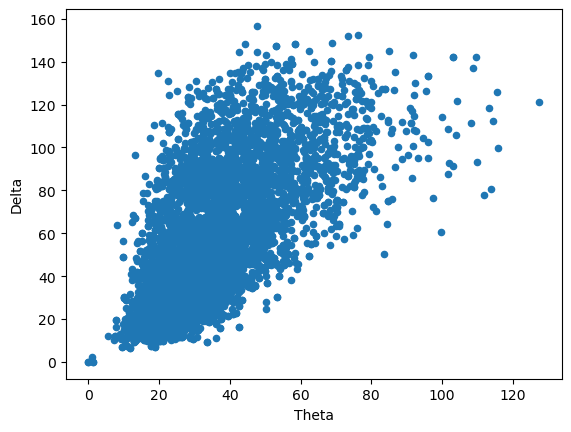

In [40]:
new_df['Theta'].corr(new_df["Delta"])
new_df.plot(x="Theta", y="Delta", kind="scatter")

<Axes: xlabel='Theta', ylabel='Alpha_low'>

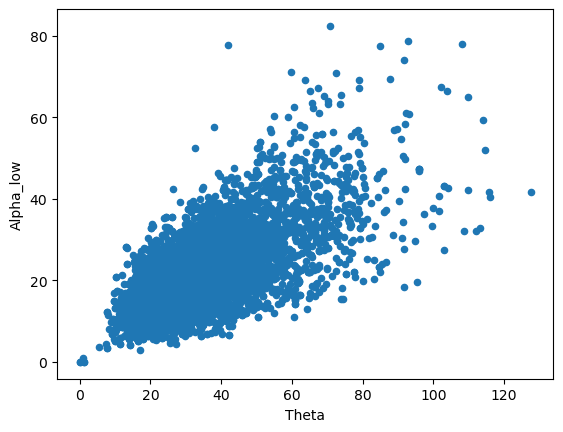

In [80]:
new_df['Theta'].corr(new_df["Alpha_low"])
new_df.plot(x="Theta", y="Alpha_low", kind="scatter")

<Axes: xlabel='Alpha_low', ylabel='Alpha_high'>

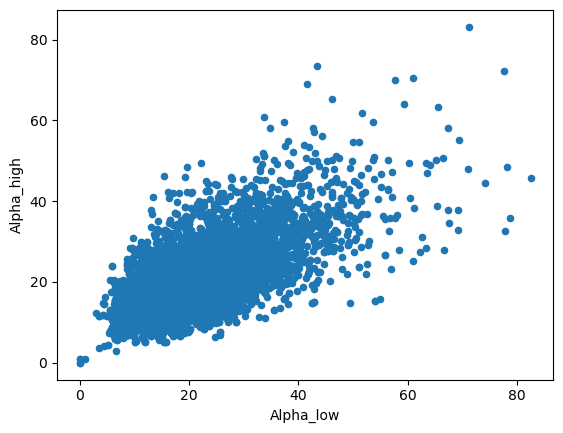

In [41]:
new_df['Alpha_low'].corr(new_df["Alpha_high"])
new_df.plot(x="Alpha_low", y="Alpha_high", kind="scatter")

<Axes: xlabel='Alpha_high', ylabel='Attention'>

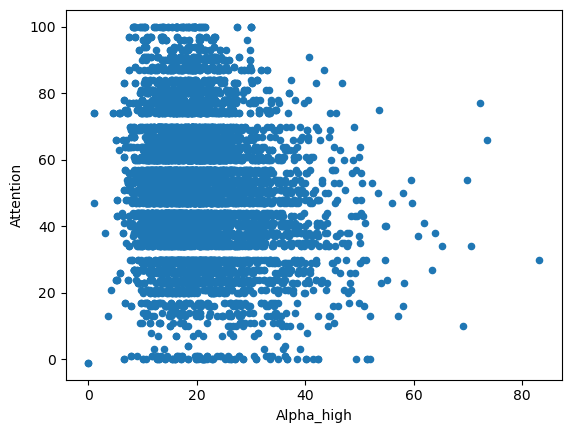

In [85]:
new_df['Alpha_high'].corr(new_df["Attention"])
new_df.plot(x="Alpha_high", y="Attention", kind="scatter")

<Axes: xlabel='Beta_high', ylabel='Attention'>

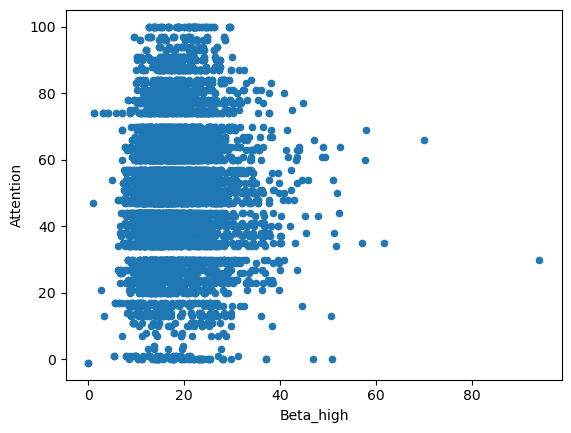

In [86]:
new_df['Beta_high'].corr(new_df["Attention"])
new_df.plot(x="Beta_high", y="Attention", kind="scatter")

<Axes: xlabel='Alpha_low', ylabel='Gamma_low'>

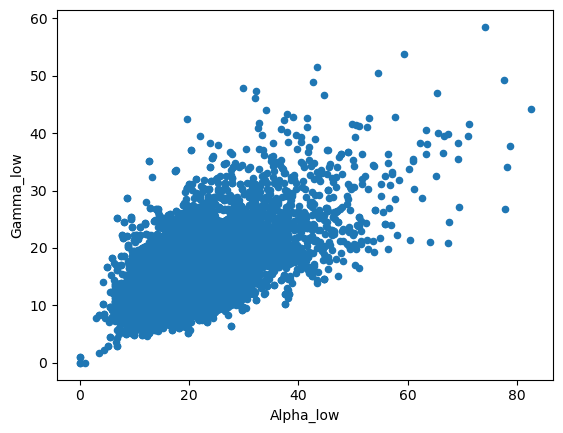

In [81]:
new_df['Alpha_low'].corr(new_df["Gamma_low"])
new_df.plot(x="Alpha_low", y="Gamma_low", kind="scatter")

<Axes: xlabel='Delta', ylabel='Gamma_high'>

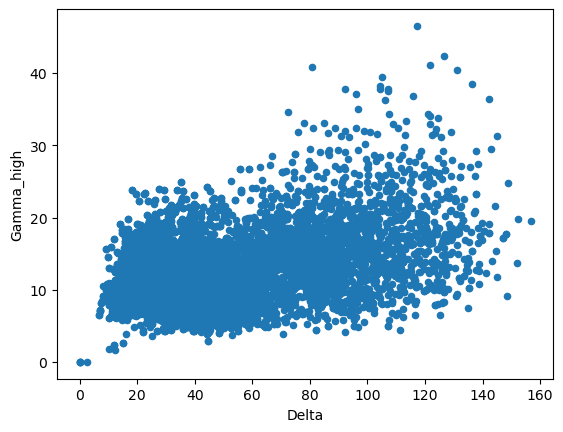

In [42]:
new_df['Delta'].corr(new_df["Gamma_high"])
new_df.plot(x="Delta", y="Gamma_high", kind="scatter")

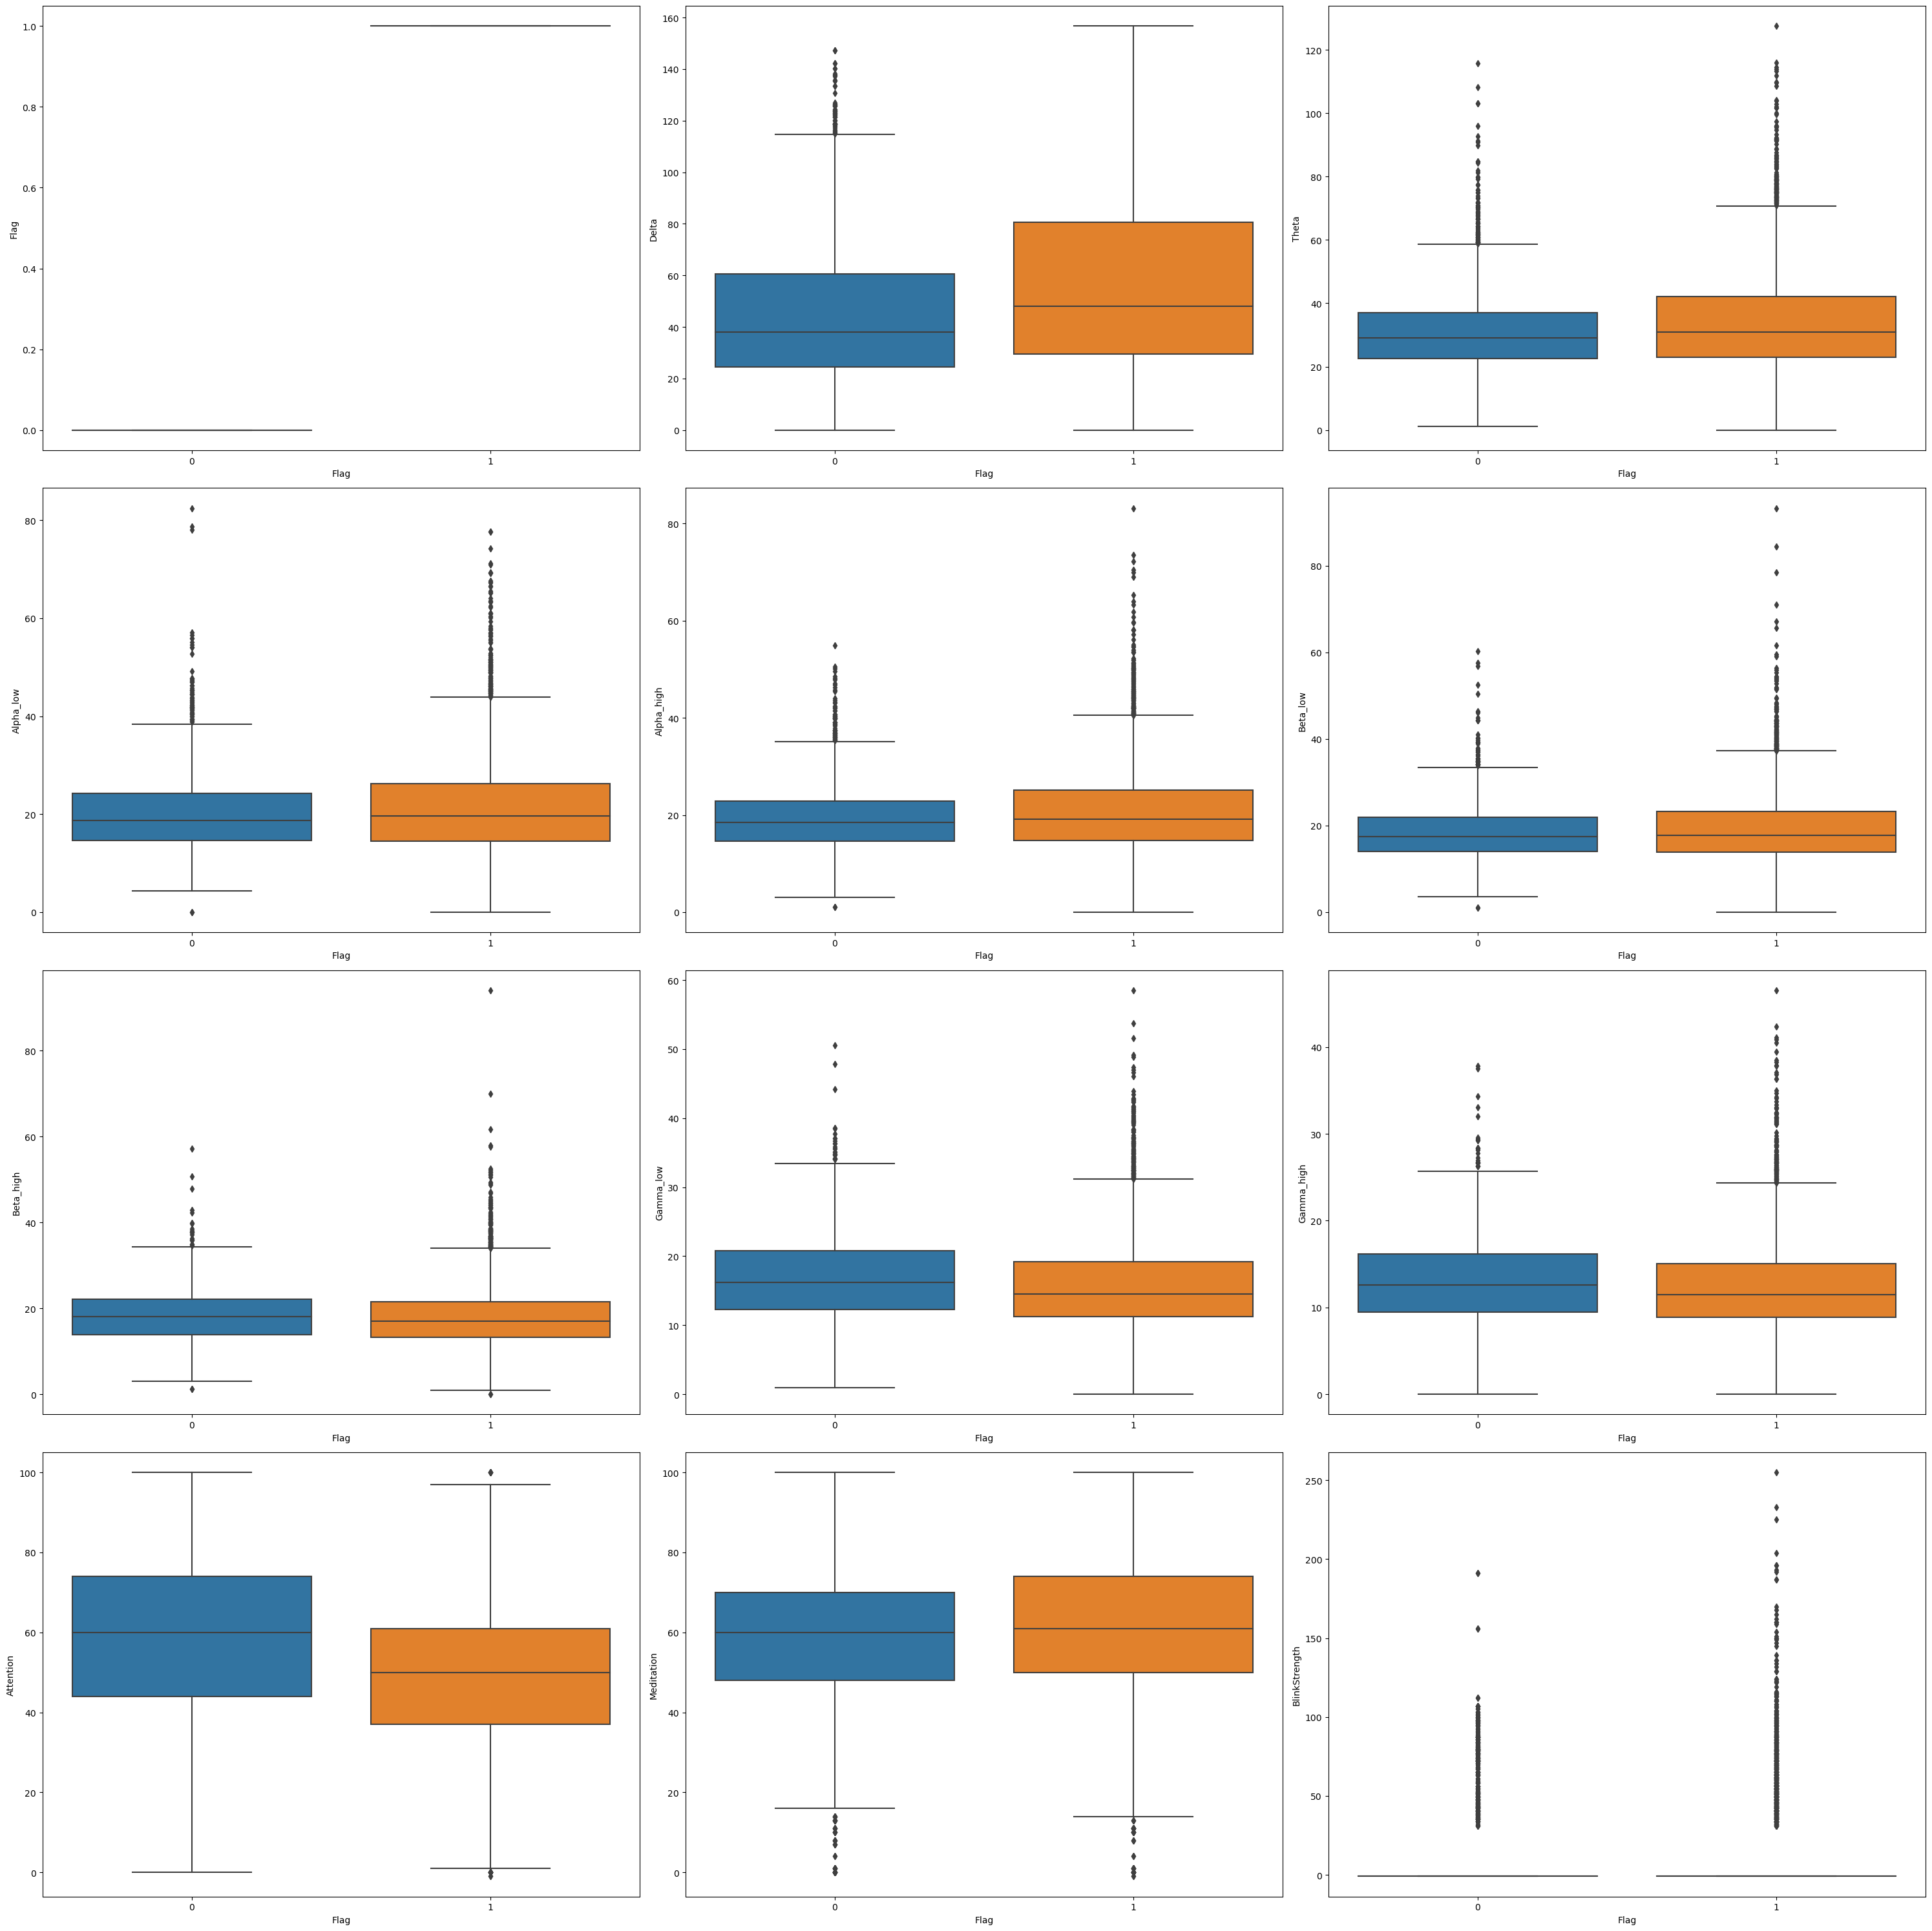

In [43]:
n_cols = 3
n_rows = 4
fig,ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,30))
row = 0
col = 0
for i in new_df.columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = new_df["Flag"], y = new_df[i], ax = axes)
    col += 1
plt.tight_layout()
plt.show()

In [44]:
import joypy

Korzystając z biblioteki `joyplot` można zobaczyć, które kolumny są potencjalnie użyteczne w przewidywaniu danej wartości. Są to te, których krzywe gęstości różnią się wizualnie.

<Figure size 800x160 with 0 Axes>

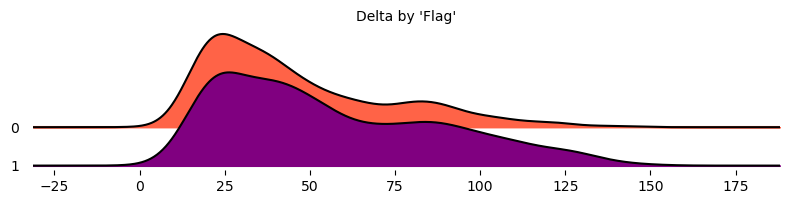

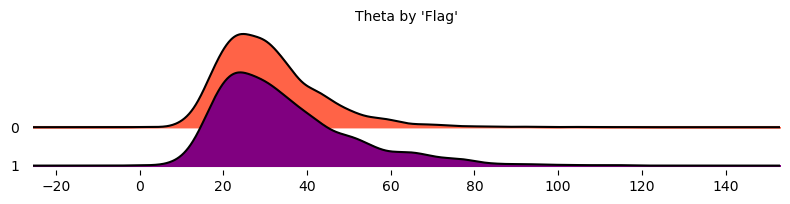

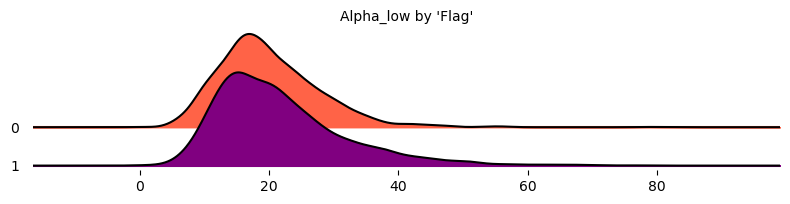

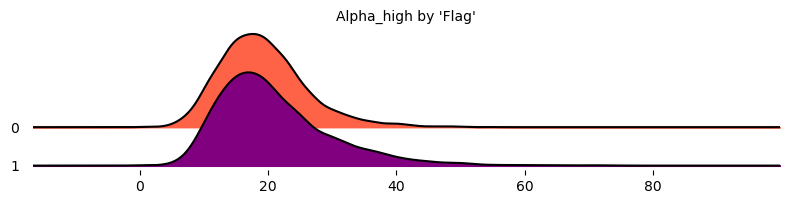

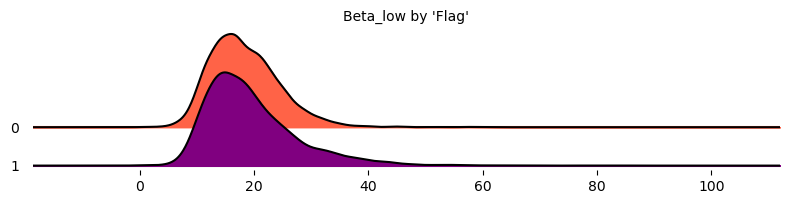

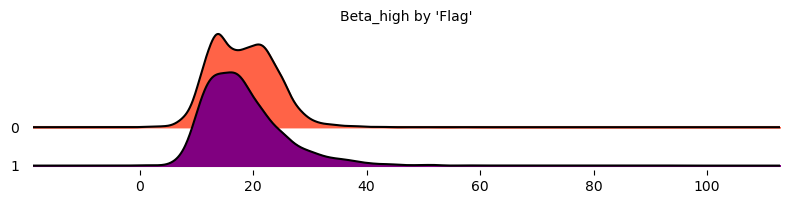

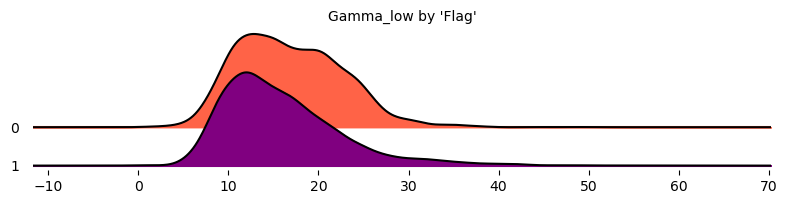

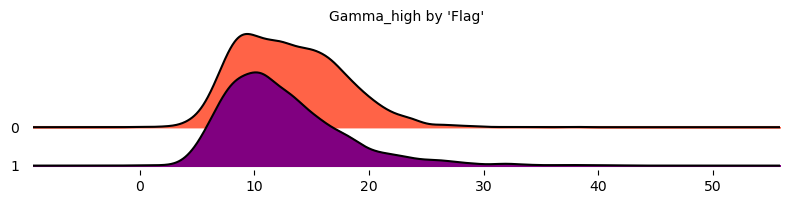

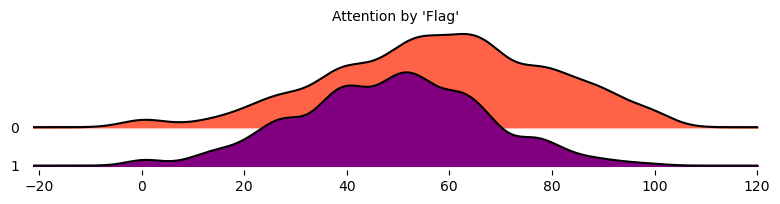

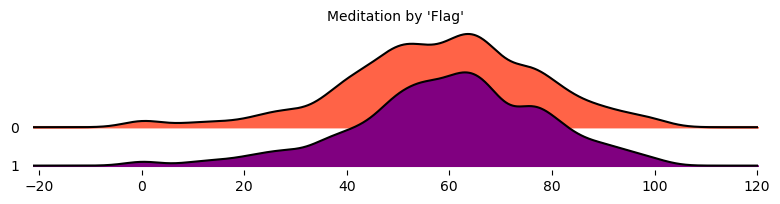

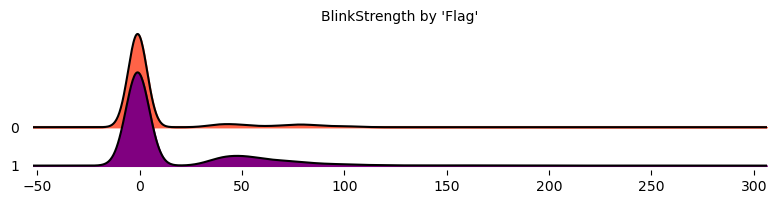

In [76]:
cols = ['Delta','Theta','Alpha_low','Alpha_high', 'Beta_low', 'Beta_high', 'Gamma_low', 'Gamma_high', 'Attention', 'Meditation', 'BlinkStrength']
plt.figure(figsize=(10,2), dpi= 80)
for i,c in enumerate(cols):
    joypy.joyplot(new_df, column=[c], by="Flag", ylim='own', figsize=(8,2), color=['tomato', 'purple']);
    plt.title(f"{c} by 'Flag'", fontsize=10)
plt.show();

W wykresach taki jak poniższy wyraźne grupowanie się punktów wskazuje, że dane zmienne mogą być pomocne do przewidywania szukanej wartości

/home/kamcia/miniconda3/envs/ML/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x640 with 0 Axes>

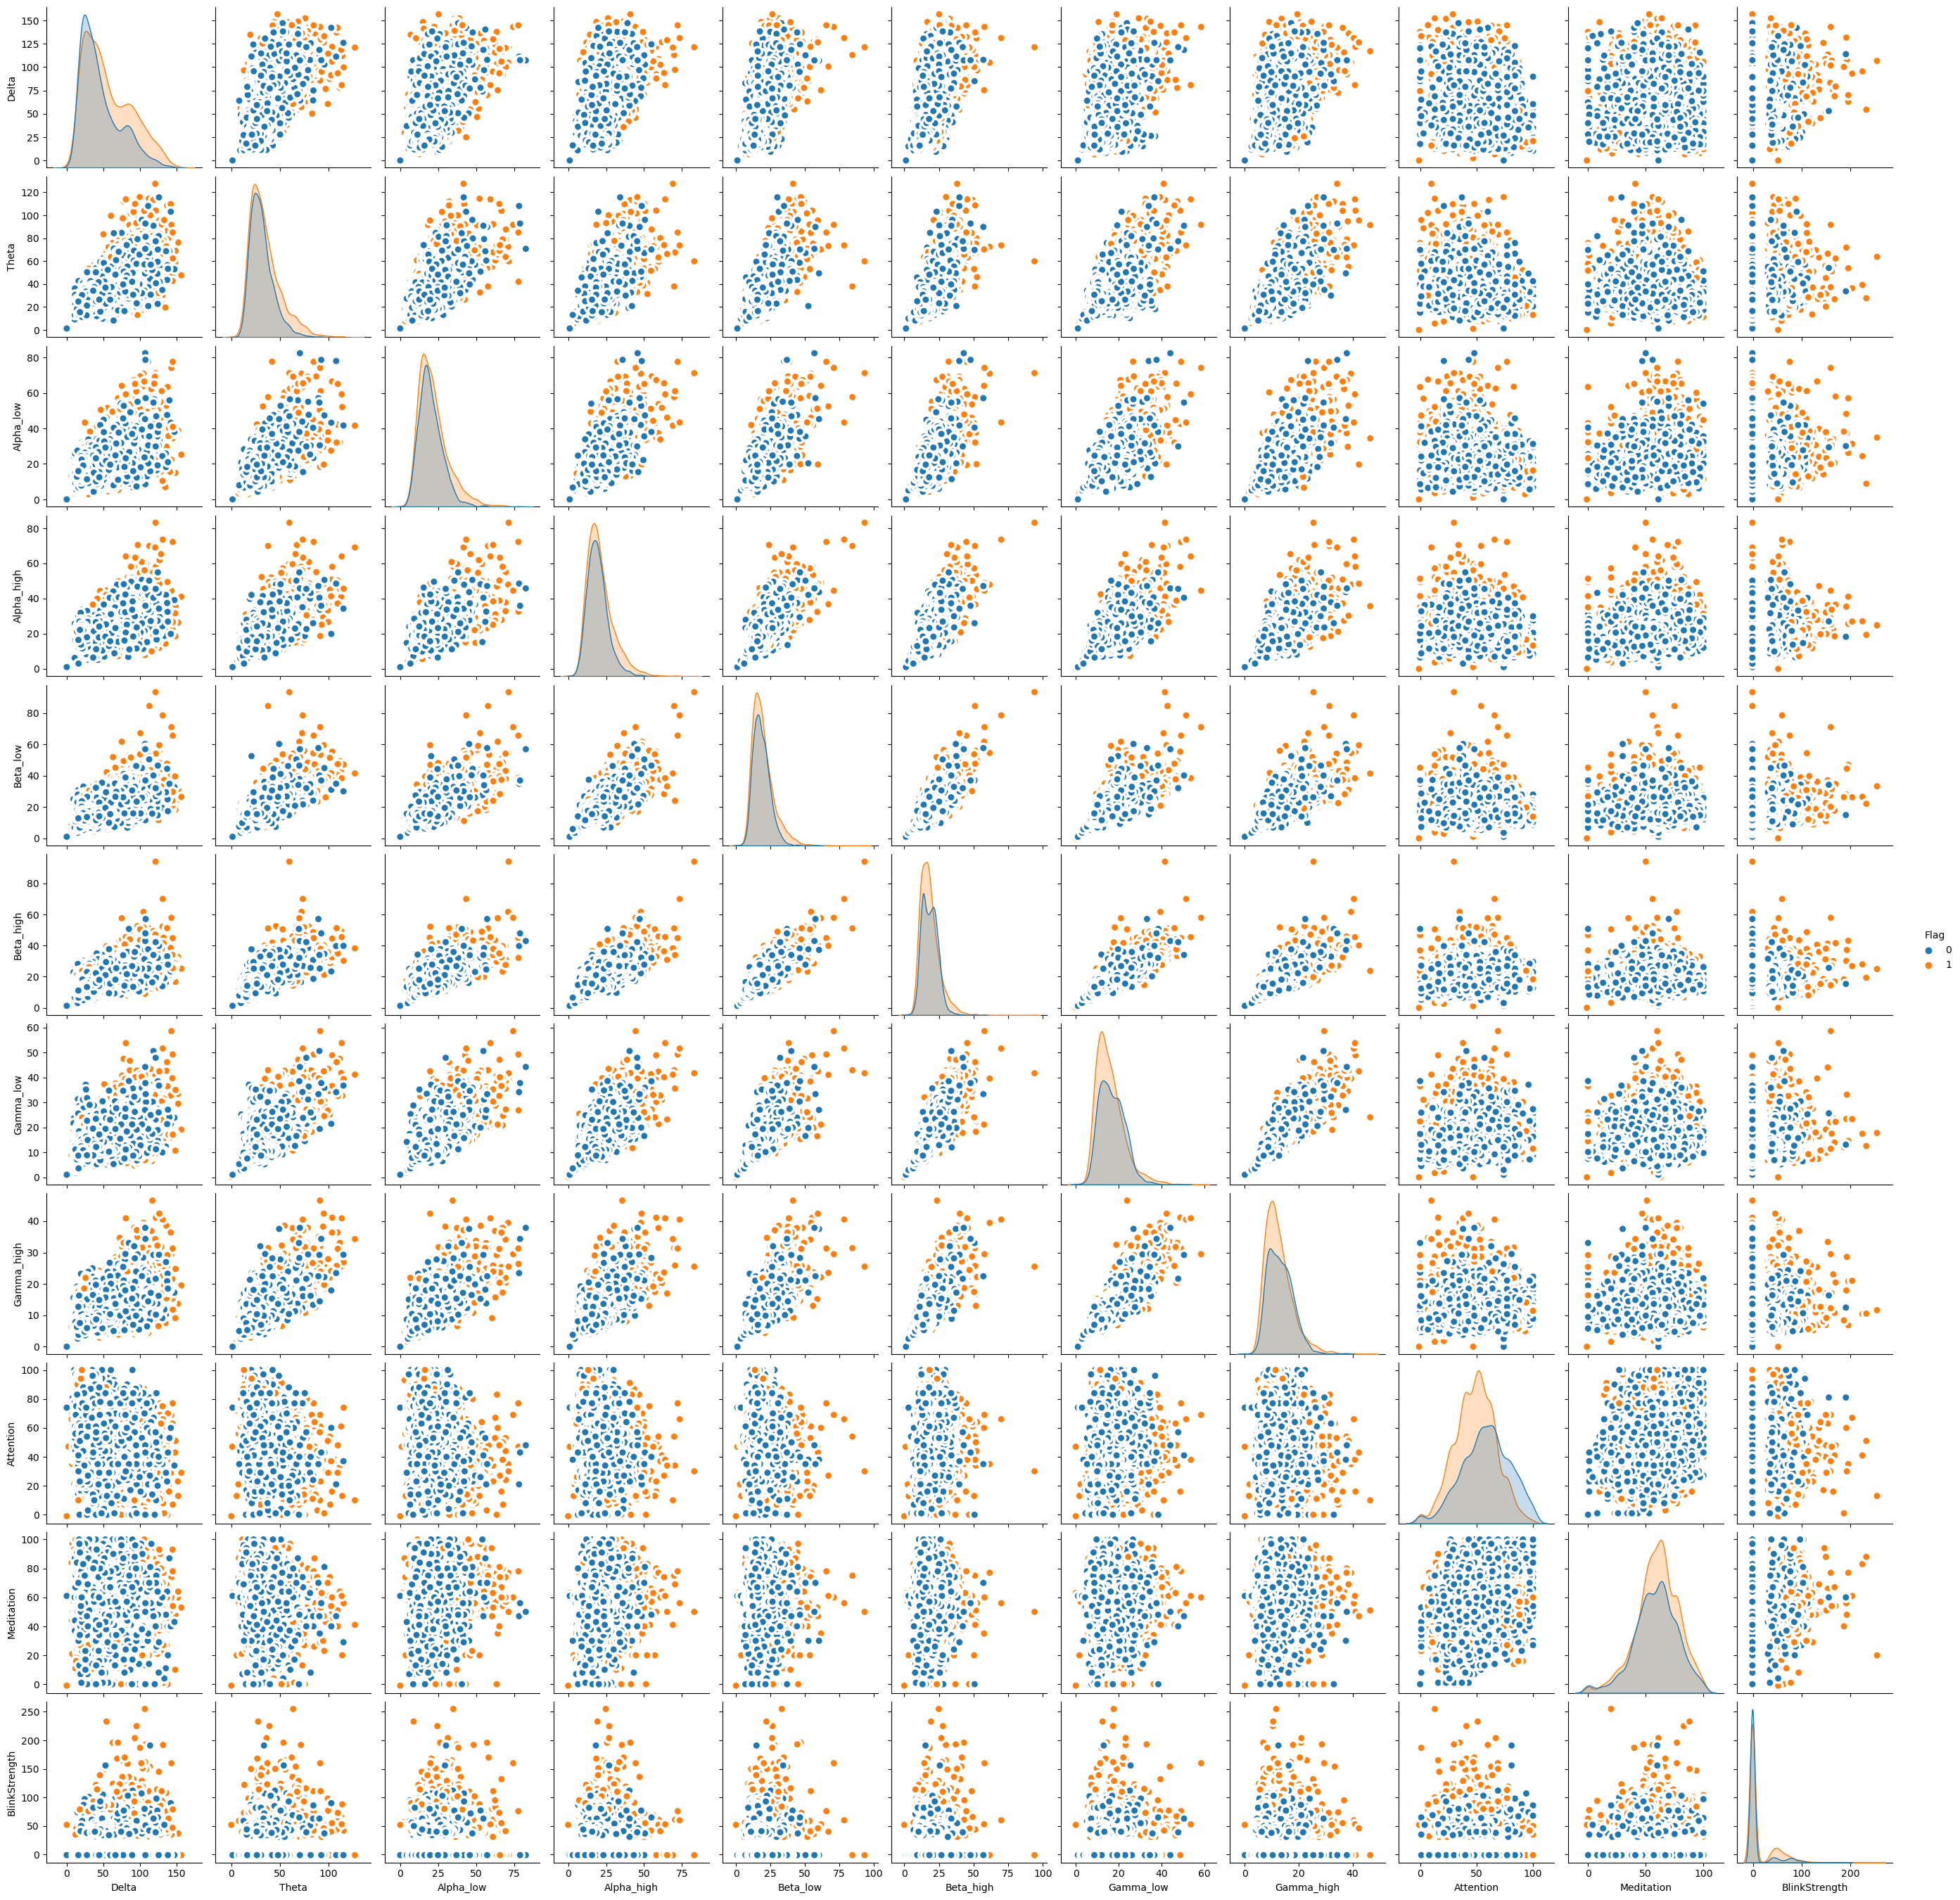

In [77]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(new_df.loc[:, ['Flag', 'Delta','Theta','Alpha_low','Alpha_high', 'Beta_low', 'Beta_high', 'Gamma_low', 'Gamma_high', 'Attention', 'Meditation', 'BlinkStrength']], 
             kind="scatter", hue="Flag", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.tight_layout()
plt.show();

## 5. Interpretacja

**O falach samych w sobie**
<br>Poszczególne rodzaje fal mózgowych występują w następujących przedziałach:</br>
* Delta: 0,5-3 Hz
* Theta: 4-7 Hz
* Alpha: 8-12 Hz
* Beta: 13-28 Hz
* Gamma: 30-100Hz

Ciekawie byłoby zbadać następujące tezy:
* jak często pojawiają się fale beta o niższej częstotliwości (teoretycznie powinny się mocno wybijać, jeśli dane były zbierane za dnia),
* czy podwyższone fale alfa korelują z niższym skupieniem, czy ich normalny poziom koreluje z koncentracją i medytacją,
* czy wysokie fale beta korelują zarówno z wysoką koncentracją, jak i stresem i lękiem - czy medytacja obniża ich poziom,
* jeśli fale gamma korelują ze skrajnymi emocjami, to czy podczas medytacji i skupiania się ich poziom powinien być obniżony,
* czy wysoki poziom fal theta koreluje z medytacją i kreatywnością przyczyniając się jednocześnie do gorszego skupienia,

jeśli dysponowalibyśmy dużym, sprawdzonym zbiorem danych.

Jeśli chodzi o jednostkę, w której zostały zapisane pomiary, to jest ona charakterystyczna dla użytego urządzenia. Znalazłam informację o tym, że max sampling rate dla opaski, którą były zbierane dane wynosi 512, a dane z EEG przechowuje się często po zastosowaniu na nich **szybkiej transformaty Fouriera (FFT)**. Z tego teoretycznie można by uzyskać częstotliwość fal, ale trzeba byłoby wiedzieć ile próbek zebrano w ogóle, tj. jak długo trwało badanie jednej osoby.

**O danych w kontekście ML**
<br>Patrząc na wykresy sporządzone przy pomocy biblioteki `joyplot` zdaje się, że najbardziej obiecujące przy przewidywaniu zmiennej `Flag` będą zmienne `Attention`, `Gamma_low`, `Gamma_high` i być może `Beta_high`. Ze znajdującej się niżej matrycy ciężko wyłonić faworytów. Spoglądając na wykresy pudełkowe w oczy rzuca się `Delta`. Dla flagi wynoszącej jeden wartości Delty zdają się bardziej rozciągnięte.